### You are given a bike rental dataset. The dataset contains temperature information and the bike rental for the given temperature. Build a Simple Linear Regression model to predict the bike rental, given a temperature.

### Step1: Import dataset and do necessary cleaning

In [1]:
#Import libraries
import joblib
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
#Load the dataset
data = pd.read_csv('bike_rental.csv')

In [3]:
data.head()

,Date,Rented Bike Count,Temperature(C)
0,01/12/2017,254,-5.2
1,01/12/2017,204,-5.5
2,01/12/2017,173,-6.0
3,01/12/2017,107,-6.2
4,01/12/2017,78,-6.0


In [4]:
#Drop Date Column
data = data.drop(columns=['Date'])

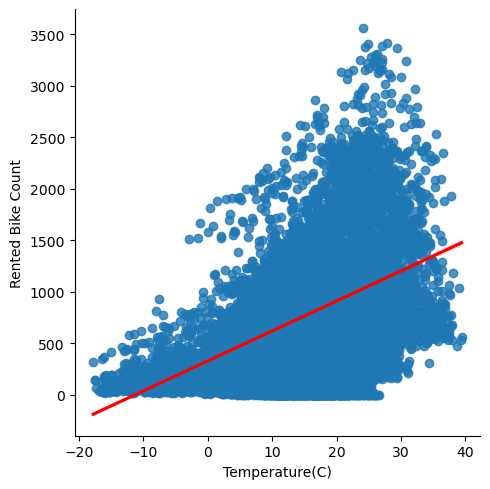

In [5]:
graph = sns.lmplot(y ="Rented Bike Count", x ="Temperature(C)", data = data, order = 1, line_kws={'color': 'red'})
graph_file_path = 'lmplot_graph.png'
graph.savefig(graph_file_path)

### Step 2: Model Building


In [6]:
data = data.rename(columns={"Rented Bike Count": "bike_rental", "Temperature(C)": "temp"})
data.head()

,bike_rental,temp
0,254,-5.2
1,204,-5.5
2,173,-6.0
3,107,-6.2
4,78,-6.0


In [7]:
#Define x and y variable
X = data['temp'].values.reshape(-1, 1)
y = data['bike_rental'].values

In [8]:
#Create Train and Test Datasets with 8:2 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=36)

In [9]:
#Fit a Simple Linear Regression to the Training set
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [10]:
#Find the model parameters

In [11]:
y_pred = model.predict(X_test)

### Step 3: Model Evaluation 

In [12]:
#Find the RMSE and r2 of the model
mse = mean_squared_error(y_test, y_pred)
print(np.sqrt(mse))

548.4698531900177


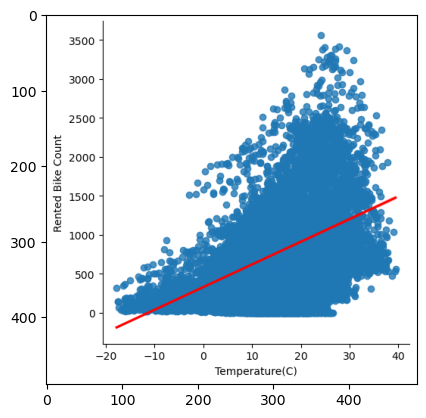

In [13]:
#Plot a scatter plot with test dataset and the trained model
loaded_graph = plt.imread(graph_file_path)
plt.imshow(loaded_graph)
plt.show()

### Step 4: Model Generalization

In [14]:
#Save model to disk
joblib.dump(model, 'linear_regression_model.joblib')

['linear_regression_model.joblib']

In [15]:
#Make prediction using saved model on Temperature -6
loaded_model = joblib.load('linear_regression_model.joblib')

In [16]:
def prediction_function(temp):
    new_temperature = np.array([[temp]])
    prediction = loaded_model.predict(new_temperature)
    print(f'Predicted Bike Rental when Temperature is {temp} : {int(prediction[0])} bikes')

In [17]:
prediction_function(-6)

Predicted Bike Rental when Temperature is -6 : 148 bikes
